In [8]:
import requests
import json
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch
import networkx as nx
import umap
from sklearn.cluster import KMeans

In [2]:
cell_ids = [
  "40211",
  "40215",
  "40223",
  "40227",
  "40229",
  "40234",
  "40236",
  "40244",
  "40245",
  "40249",
  "40250",
  "40255",
  "40258",
  "40267",
  "40269",
  "40273",
  "40282",
  "40286",
  "40290",
  "40293",
  "40298",
  "40301",
  "40304",
  "40309",
  "40311",
  "40315",
  "40329",
  "40337",
  "40345",
  "40347",
  "40348",
  "40349",
  "40351",
  "40355",
  "40362",
  "40366",
  "40369",
  "40373",
  "40374",
  "40376",
  "40381",
  "40387",
  "40390",
  "40391",
  "40394",
  "40395",
  "40404",
  "40420",
  "40424",
  "40426",
  "40430",
  "40432",
  "40437",
  "40444",
  "40447",
  "40448",
  "40449",
  "40459",
  "40464",
  "40472",
  "40476",
  "40479",
  "40504",
  "40506",
  "40507",
  "40510",
  "40513",
  "40514",
  "40524",
  "40527",
  "40529",
  "40530",
  "40539",
  "40540",
  "40546",
  "40550",
  "40552",
  "40555",
  "40559",
  "40560",
  "40568",
  "40573",
  "40581",
  "40591",
  "40592",
  "40605",
  "40609",
  "40612",
  "40613",
  "40624",
  "40633",
  "40639",
  "40642",
  "40643",
  "40644",
  "40645",
  "40649",
  "40663",
  "40667",
  "40669",
  "40680",
  "40689",
  "40690",
  "40691",
  "40693",
  "40696",
  "40697",
  "40706",
  "40711",
  "40713",
  "40715",
  "40718",
  "40722",
  "40723",
  "40727",
  "40732",
  "40733",
  "40736",
  "40739",
  "40742",
  "40749",
  "40750",
  "40751",
  "40758",
  "40763",
  "40767",
  "40769",
  "40778",
  "40779",
  "40781",
  "40787",
  "40788",
  "40794",
  "40797",
  "40798",
  "40803",
  "40806",
  "40807",
  "40808",
  "40812",
  "40814",
  "40815",
  "40818",
  "40839",
  "40841",
  "40852",
  "40864",
  "40872",
  "40875",
  "40877",
  "40878",
  "40879",
  "40881",
  "40888",
  "40897",
  "40902",
  "40903",
  "40904",
  "40912",
  "40913",
  "40918",
  "40921",
  "40923",
  "40924",
  "40930",
  "40931",
  "40944",
  "40947",
  "40951",
  "40961",
  "40968",
  "40970",
  "40972",
  "40975",
  "40979",
  "40981",
  "40987",
  "40993",
  "41003",
  "41005",
  "41014",
  "41024",
  "41026",
  "41031",
  "41033",
  "41038",
  "41041",
  "41044",
  "41051",
  "41053",
  "41062",
  "41066",
  "41072",
  "41073",
  "41075",
  "41076",
  "41079",
  "41095",
  "41096",
  "41097",
  "41103",
  "41106",
  "41107",
  "41109",
  "41113",
  "41122",
  "41127",
  "41136",
  "41137",
  "41146",
  "41161",
  "41163",
  "41165",
  "41171",
  "41173",
  "41175",
  "41180",
  "41193",
  "41194",
  "41206",
  "41207",
  "41212",
  "41216",
  "41220",
  "41223",
  "41224",
  "41231",
  "41238",
  "41244",
  "41246",
  "41247",
  "41253",
  "41261",
  "41263",
  "41268",
  "41270",
  "41273",
  "41276",
  "41277",
  "41278",
  "41279",
  "41286",
  "41288",
  "41301",
  "41314",
  "41324",
  "41325",
  "41330",
  "41334",
  "41342",
  "41347",
  "41350",
  "41354",
  "41362",
  "41366",
  "41372",
  "41385",
  "41386",
  "41394",
  "41397",
  "41402",
  "41405",
  "41407",
  "41409",
  "41411",
  "41414",
  "41421",
  "41423",
  "41424",
  "41427",
  "41430",
  "41434",
  "41442",
  "41445",
  "41455",
  "41458",
  "41459",
  "41468",
  "41474",
  "41477",
  "41480",
  "41483",
  "41499",
  "41502",
  "41503",
  "41509",
  "41525",
  "41528",
  "41530",
  "41534",
  "41540",
  "41548",
  "41549",
  "41550",
  "41555",
  "41558",
  "41566",
  "41568",
  "41569",
  "41578",
  "41581",
  "41582",
  "41583",
  "41588",
  "41597",
  "41598",
  "41599",
  "41600",
  "41605",
  "41606",
  "41613",
  "41625",
  "41629",
  "41630",
  "41632",
  "41645",
  "41647",
  "41657",
  "41662",
  "41663",
  "41665",
  "41667",
  "41670",
  "41679",
  "41700",
  "41706",
  "41708",
  "41711",
  "41713",
  "41721",
  "41723",
  "41725",
  "41740",
  "41741",
  "41743",
  "41744",
  "41747",
  "41753",
  "41754",
  "41755",
  "41757",
  "41760",
  "41768",
  "41769",
  "41770",
  "41782",
  "41786",
  "41791",
  "41797",
  "41812",
  "41822",
  "41823",
  "41825",
  "41828",
  "41832",
  "41833",
  "41834",
  "41844",
  "41855",
  "41863",
  "41868",
  "41870",
  "41885",
  "41888",
  "41891",
  "41895",
  "41896",
  "41899",
  "41902",
  "41904",
  "41912",
  "41913",
  "41920",
  "41924",
  "41927",
  "41931",
  "41937",
  "41945",
  "41947",
  "41951",
  "41954",
  "41961",
  "41975",
  "41977",
  "41979",
  "41989",
  "41990",
  "41992",
  "41993",
  "41994",
  "42001",
  "42004",
  "42006",
  "42008",
  "42011",
  "42023",
  "42026",
  "42027",
  "42044",
  "42047",
  "42050",
  "42052",
  "42059",
  "42060",
  "42061",
  "42068",
  "42071",
  "42078",
  "42085",
  "42086",
  "42088",
  "42094",
  "42097",
  "42103",
  "42114",
  "42125",
  "42127",
  "42128",
  "42133",
  "42135",
  "42138",
  "42145",
  "42165",
  "42179",
  "42183",
  "42195",
  "42202",
  "42203",
  "42206",
  "42214",
  "42215",
  "42218",
  "42225",
  "42226",
  "42241",
  "42246",
  "42251",
  "42253",
  "42255",
  "42264",
  "42278",
  "42279",
  "42280",
  "42282",
  "42288",
  "42292",
  "42296",
  "42297",
  "42302",
  "42313",
  "42328",
  "42330",
  "42335",
  "42338",
  "42342",
  "42359",
  "42372",
  "42373",
  "42376",
  "42382",
  "42389",
  "42393",
  "42409",
  "42412",
  "42418",
  "42439",
  "42440",
  "42445",
  "42449",
  "42453",
  "42476",
  "42488",
  "42489",
  "42491",
  "42498",
  "42503",
  "42504",
  "42505",
  "42508",
  "42516",
  "42523",
  "42525",
  "42526",
  "42527",
  "42531",
  "42540",
  "42541",
  "42544",
  "42546",
  "42554",
  "42561",
  "42572",
  "42582",
  "42584",
  "42587",
  "42599",
  "42605",
  "42608",
  "42616",
  "42623",
  "42625",
  "42630",
  "42633",
  "42638",
  "42642",
  "42643",
  "42648",
  "42650",
  "42655",
  "42666",
  "42676",
  "42679",
  "42698",
  "42701",
  "42705",
  "42711",
  "42720",
  "42723",
  "42724",
  "42741",
  "42754",
  "42769",
  "42781",
  "42782",
  "42783",
  "42791",
  "42795",
  "42798",
  "42806",
  "42817",
  "42820",
  "42822",
  "42823",
  "42826",
  "42827",
  "42834",
  "42837",
  "42839",
  "42850",
  "42861",
  "42866",
  "42878",
  "42879",
  "42885",
  "42889",
  "42897",
  "42909",
  "42917",
  "42918",
  "42928",
  "42939",
  "42955",
  "42959",
  "42962",
  "42965",
  "42976",
  "42983",
  "42985",
  "42992",
  "42999",
  "43010",
  "43011",
  "43019",
  "43022",
  "43028",
  "43037",
  "43040",
  "43042",
  "43045",
  "43049",
  "43051",
  "43057",
  "43059",
  "43071",
  "43072",
  "43074",
  "43075",
  "43080",
  "43100",
  "43121",
  "43125",
  "43132",
  "43143",
  "43146",
  "43171",
  "43180",
  "43185",
  "43188",
  "43190",
  "43192",
  "43205",
  "43207",
  "43215",
  "43216",
  "43221",
  "43229",
  "43238",
  "43245",
  "43257",
  "43258",
  "43261",
  "43267",
  "43268",
  "43272",
  "43285",
  "43290",
  "43295",
  "43298",
  "43299",
  "43301",
  "43304",
  "43319",
  "43324",
  "43333",
  "43341",
  "43348",
  "43356",
  "43357",
  "43373",
  "43383",
  "43388",
  "43390",
  "43392",
  "43399",
  "43403",
  "43404",
  "43405",
  "43406",
  "43407",
  "43408",
  "43419",
  "43426",
  "43427",
  "43438",
  "43439",
  "43444",
  "43447",
  "43456",
  "43461",
  "43462",
  "43464",
  "43482",
  "43486",
  "43488",
  "43493",
  "43511",
  "43515",
  "43525",
  "43528",
  "43538",
  "43546",
  "43548",
  "43553",
  "43557",
  "43558",
  "43565",
  "43571",
  "43574",
  "43576",
  "43584",
  "43586",
  "43590",
  "43591",
  "43597",
  "43598",
  "43600",
  "43601",
  "43605",
  "43606",
  "43608",
  "43610",
  "43622",
  "43629",
  "43637",
  "43641",
  "43652",
  "43657",
  "43662",
  "43679",
  "43680",
  "43686",
  "43687",
  "43690",
  "43698",
  "43707",
  "43714",
  "43716",
  "43719",
  "43721",
  "43723",
  "43724",
  "43725",
  "43737",
  "43738",
  "43739",
  "43744",
  "43750",
  "43755",
  "43758",
  "43759",
  "43762",
  "43764",
  "43765",
  "43767",
  "43768",
  "43772",
  "43781",
  "43797",
  "43804",
  "43806",
  "43811",
  "43817",
  "43818",
  "43820",
  "43823",
  "43824",
  "43828",
  "43837",
  "43839",
  "43849",
  "43850",
  "43858",
  "43872",
  "43876",
  "43878",
  "43880",
  "43887",
  "43896",
  "43897",
  "43900",
  "43905",
  "43907",
  "43911",
  "43916",
  "43920",
  "43923",
  "43931",
  "43933",
  "43934",
  "43938",
  "43940",
  "43943",
  "43947",
  "43949",
  "43954",
  "43968",
  "43974",
  "43979",
  "43987",
  "43991",
  "44008",
  "44017",
  "44034",
  "44036",
  "44042",
  "44044",
  "44049",
  "44053",
  "44054",
  "44057",
  "44058",
  "44060",
  "44061",
  "44067",
  "44068",
  "44080",
  "44084",
  "44090",
  "44091",
  "44092",
  "44105",
  "44106",
  "44111",
  "44113",
  "44117",
  "44119",
  "44121",
  "44122",
  "44125",
  "44132",
  "44146",
  "44149",
  "44150",
  "44154",
  "44160",
  "44175",
  "44183",
  "44184",
  "44190",
  "44192",
  "44194",
  "44196",
  "44198",
  "44201",
  "44213",
  "44219",
  "44228",
  "44233",
  "44236",
  "44237",
  "44240",
  "44244",
  "44246",
  "44254",
  "44257",
  "44261",
  "44264",
  "44269",
  "44272",
  "44299",
  "44301",
  "44305",
  "44313",
  "44319",
  "44329",
  "44339",
  "44340",
  "44342",
  "44346",
  "44365",
  "44366",
  "44367",
  "44373",
  "44378",
  "44387",
  "44389",
  "44391",
  "44392",
  "44437",
  "44464",
  "44467",
  "44475",
  "44482",
  "44484",
  "44489",
  "44491",
  "44492",
  "44494",
  "44498",
  "44499",
  "44508",
  "44516",
  "44532",
  "44536",
  "44541",
  "44546",
  "44547",
  "44562",
  "44563",
  "44565",
  "44566",
  "44568",
  "44583",
  "44594",
  "44597",
  "44600",
  "44601",
  "44620",
  "44639",
  "44646",
  "44647",
  "44650",
  "44654",
  "44655",
  "44658",
  "44665",
  "44680",
  "44682",
  "44698",
  "44699",
  "44703",
  "44726",
  "44736",
  "44742",
  "44744",
  "44748",
  "44758",
  "44760",
  "44762",
  "44770",
  "44773",
  "44776",
  "44779",
  "44780",
  "44781",
  "44785",
  "44787",
  "44795",
  "44799",
  "44804",
  "44807",
  "44809",
  "44812",
  "44819",
  "44821",
  "44830",
  "44832",
  "44838",
  "44850",
  "44851",
  "44858",
  "44861",
  "44876",
  "44877",
  "44890",
  "44893",
  "44900",
  "44906",
  "44924",
  "44936",
  "44939",
  "44941",
  "44954",
  "44957",
  "44959",
  "44964",
  "44969",
  "44978",
  "44980",
  "44984",
  "44993",
  "45002",
  "45004",
  "45006",
  "45026",
  "45028",
  "45046",
  "45050",
  "45051",
  "45058",
  "45061",
  "45064",
  "45068",
  "45071",
  "45076",
  "45086",
  "45090",
  "45096",
  "45097",
  "45109",
  "45132",
  "45133",
  "45134",
  "45138",
  "45149",
  "45150",
  "45167",
  "45174",
  "45180",
  "45196",
  "45216",
  "45228",
  "45229",
  "45236",
  "45244",
  "45257",
  "45262",
  "45265",
  "45267",
  "45273",
  "45285",
  "45291",
  "45293",
  "45294",
  "45309",
  "45311",
  "45314",
  "45315",
  "45316",
  "45321",
  "45332",
  "45334",
  "45344",
  "45350",
  "45354",
  "45367",
  "45377",
  "45387",
  "45389",
  "45404",
  "45405",
  "45408",
  "45409",
  "45413",
  "45427",
  "45432",
  "45437",
  "45441",
  "45459",
  "45460",
  "45463",
  "45466",
  "45468",
  "45471",
  "45491",
  "45493",
  "45494",
  "45498",
  "45499",
  "45507",
  "45511",
  "45517",
  "45523",
  "45544",
  "45547",
  "45555",
  "45570",
  "45573",
  "45574",
  "45613",
  "45619",
  "45626",
  "45627",
  "45630",
  "45631",
  "45633",
  "45638",
  "45641",
  "45647",
  "45648",
  "45655",
  "45667",
  "45676",
  "45685",
  "45699",
  "45711",
  "45718",
  "45720",
  "45729",
  "45756",
  "45763",
  "45767",
  "45771",
  "45792",
  "45802",
  "45809",
  "45814",
  "45815",
  "45828",
  "45829",
  "45833",
  "45842",
  "45847",
  "45852",
  "45855",
  "45864",
  "45882",
  "45888",
  "45889",
  "45896",
  "45942",
  "45943",
  "45944",
  "45950",
  "45963",
  "45964",
  "45969",
  "45980",
  "45995",
  "45996",
  "46001",
  "46003",
  "46009",
  "46015",
  "46029",
  "46032",
  "46035",
  "46043",
  "46045",
  "46048",
  "46051",
  "46052",
  "46055",
  "46073",
  "46077",
  "46080",
  "46085",
  "46089",
  "46091",
  "46097",
  "46100",
  "46106",
  "46126",
  "46136",
  "46138",
  "46146",
  "46152",
  "46174",
  "46194",
  "46209",
  "46212",
  "46222",
  "46231",
  "46236",
  "46242",
  "46249",
  "46259",
  "46260",
  "46263",
  "46268",
  "46270",
  "46276",
  "46285",
  "46292",
  "46304",
  "46316",
  "46351",
  "46359",
  "46360",
  "46372",
  "46374",
  "46394",
  "46403",
  "46426",
  "46427",
  "46429",
  "46453",
  "46456",
  "46471",
  "46474",
  "46477",
  "46479",
  "46493",
  "46496",
  "46507",
  "46518",
  "46526",
  "46539",
  "46543",
  "46557",
  "46564",
  "46572",
  "46576",
  "46577",
  "46582",
  "46586",
  "46587",
  "46594",
  "46600",
  "46604",
  "46610",
  "46620",
  "46621",
  "46628",
  "46637",
  "46640",
  "46643",
  "46649",
  "46658",
  "46663",
  "46665",
  "46668",
  "46669",
  "46682",
  "46694",
  "46707",
  "46709",
  "46710",
  "46734",
  "46742",
  "46743",
  "46752",
  "46755",
  "46759",
  "46762",
  "46769",
  "46782",
  "46789",
  "46807",
  "46809",
  "46811",
  "46815",
  "46817",
  "46818",
  "46828",
  "46845",
  "46860",
  "46875",
  "46876",
  "46878",
  "46883",
  "46901",
  "46903",
  "46910",
  "46934",
  "46950",
  "46959",
  "46961",
  "46965",
  "46973",
  "46984",
  "46988",
  "47000",
  "47007",
  "47008",
  "47009",
  "47022",
  "47030",
  "47035",
  "47037",
  "47039",
  "47045",
  "47046",
  "47088",
  "47104",
  "47111",
  "47113",
  "47114",
  "47124",
  "47130",
  "47154",
  "47155",
  "47169",
  "47182",
  "47193",
  "47206",
  "47209",
  "47220",
  "47224",
  "47225",
  "47227",
  "47230",
  "47233",
  "47236",
  "47239",
  "47240",
  "47241",
  "47244",
  "47249",
  "47250",
  "47251",
  "47254",
  "47262",
  "47270",
  "47272",
  "47291",
  "47314",
  "47316",
  "47319",
  "47335",
  "47337",
  "47341",
  "47349",
  "47354",
  "47366",
  "47367",
  "47382",
  "47390",
  "47399",
  "47404",
  "47407",
  "47413",
  "47422",
  "47427",
  "47429",
  "47430",
  "47433",
  "47454",
  "47457",
  "47482",
  "47494",
  "47500",
  "47504",
  "47533",
  "47567",
  "47568",
  "47576",
  "47582",
  "47584",
  "47590",
  "47594",
  "47596",
  "47605",
  "47606",
  "47620",
  "47636",
  "47648",
  "47660",
  "47672",
  "47711",
  "47737",
  "47746",
  "47755",
  "47772",
  "47787",
  "47808",
  "47822",
  "47823",
  "47831",
  "47851",
  "47857",
  "47859",
  "47870",
  "47879",
  "47882",
  "47890",
  "47892",
  "47904",
  "47906",
  "47907",
  "47920",
  "47923",
  "47926",
  "47928",
  "47931",
  "47932",
  "47936",
  "47942",
  "47949",
  "47953",
  "47957",
  "47971",
  "47974",
  "47975",
  "47976",
  "47988",
  "47990",
  "48001",
  "48006",
  "48013",
  "48018",
  "48020",
  "48024",
  "48026",
  "48030",
  "48037",
  "48040",
  "48048",
  "48052",
  "48059",
  "48060",
  "48061",
  "48073",
  "48087",
  "48090",
  "48091",
  "48109",
  "48118",
  "48122",
  "48123",
  "48125",
  "48130",
  "48131",
  "48138",
  "48142",
  "48147",
  "48151",
  "48156",
  "48157",
  "48158",
  "48166",
  "48177",
  "48181",
  "48185",
  "48186",
  "48190",
  "48201",
  "48202",
  "48224",
  "48230",
  "48236",
  "48240",
  "48245",
  "48254",
  "48255",
  "48265",
  "48266",
  "48272",
  "48295",
  "48296",
  "48302",
  "48305",
  "48308",
  "48317",
  "48318",
  "48332",
  "48338",
  "48339",
  "48349",
  "48358",
  "48362",
  "48364",
  "48367",
  "48390",
  "48392",
  "48394",
  "48395",
  "48396",
  "48409",
  "48418",
  "48431",
  "48448",
  "48460",
  "48466",
  "48467",
  "48473",
  "48492",
  "48500",
  "48503",
  "48518",
  "48521",
  "48522",
  "48526",
  "48530",
  "48532",
  "48546",
  "48549",
  "48559",
  "48592",
  "48595",
  "48600",
  "48602",
  "48608",
  "48610",
  "48616",
  "48618",
  "48626",
  "48628",
  "48667",
  "48675",
  "48681",
  "48685",
  "48689",
  "48696",
  "48705",
  "48709",
  "48711",
  "48716",
  "48717",
  "48726",
  "48727",
  "48732",
  "48734",
  "48742",
  "48756",
  "48759",
  "48764",
  "48776",
  "48805",
  "48819",
  "48820",
  "48827",
  "48831",
  "48851",
  "48855",
  "48864",
  "48866",
  "48867",
  "48872",
  "48881",
  "48905",
  "48943",
  "48953",
  "48961",
  "48982",
  "48991",
  "48999",
  "49004",
  "49006",
  "49008",
  "49017",
  "49026",
  "49042",
  "49045",
  "49058",
  "49076",
  "49082",
  "49098",
  "49099",
  "49102",
  "49120",
  "49121",
  "49128",
  "49135",
  "49150",
  "49163",
  "49164",
  "49180",
  "49184",
  "49190",
  "49200",
  "49202",
  "49205",
  "49219",
  "49229",
  "49236",
  "49240",
  "49247",
  "49269",
  "49274",
  "49275",
  "49283",
  "49297",
  "49310",
  "49312",
  "49314",
  "49322",
  "49327",
  "49328",
  "49335",
  "49345",
  "49351",
  "49356",
  "49360",
  "49384",
  "49417",
  "49422",
  "49423",
  "49429",
  "49431",
  "49433",
  "49439",
  "49443",
  "49447",
  "49485",
  "49490",
  "49511",
  "49516",
  "49519",
  "49528",
  "49544",
  "49547",
  "49558",
  "49582",
  "49610",
  "49616",
  "49619",
  "49623",
  "49629",
  "49645",
  "49662",
  "49666",
  "49680",
  "49702",
  "49703",
  "49704",
  "49706",
  "49725",
  "49739",
  "49746",
  "49753",
  "49754",
  "49759",
  "49783",
  "49796",
  "49797",
  "49798",
  "49801",
  "49805",
  "49808",
  "49812",
  "49822",
  "49839",
  "49845",
  "49868",
  "49870",
  "49886",
  "49888",
  "49892",
  "49894",
  "49905",
  "49914",
  "49921",
  "49926",
  "49938",
  "49953",
  "49966",
  "49970",
  "49975",
  "49979",
  "49985",
  "49991",
  "49993",
  "49998",
  "49999",
  "50006",
  "50010",
  "50026",
  "50035",
  "50046",
  "50054",
  "50058",
  "50059",
  "50065",
  "50070",
  "50075",
  "50085",
  "50087",
  "50088",
  "50109",
  "50120",
  "50134",
  "50140",
  "50141",
  "50145",
  "50163",
  "50180",
  "50183",
  "50185",
  "50192",
  "50210",
  "50214",
  "50219",
  "50223",
  "50224",
  "50225",
  "50254",
  "50261",
  "50268",
  "50290",
  "50300",
  "50311",
  "50320",
  "50327",
  "50341",
  "50352",
  "50358",
  "50363",
  "50381",
  "50406",
  "50421",
  "50427",
  "50434",
  "50445",
  "50450",
  "50451",
  "50452",
  "50457",
  "50463",
  "50482",
  "50485",
  "50488",
  "50489",
  "50494",
  "50501",
  "50509",
  "50516",
  "50518",
  "50520",
  "50521",
  "50529",
  "50545",
  "50547",
  "50548",
  "50554",
  "50556",
  "50565",
  "50569",
  "50570",
  "50571",
  "50580",
  "50584",
  "50587",
  "50597",
  "50605",
  "50618",
  "50626",
  "50632",
  "50633",
  "50640",
  "50652",
  "50653",
  "50654",
  "50667",
  "50670",
  "50685",
  "50686",
  "50687",
  "50691",
  "50697",
  "50699",
  "50704",
  "50712",
  "50713",
  "50724",
  "50728",
  "50755",
  "50761",
  "50770",
  "50772",
  "50776",
  "50779",
  "50780",
  "50794",
  "50806",
  "50812",
  "50815",
  "50816",
  "50820",
  "50821",
  "50824",
  "50832",
  "50836",
  "50844",
  "50858",
  "50867",
  "50868",
  "50871",
  "50872",
  "50879",
  "50884",
  "50887",
  "50890",
  "50891",
  "50900",
  "50905",
  "50908",
  "50917",
  "50932",
  "50933",
  "50935",
  "50958",
  "50959",
  "50969",
  "50980",
  "50987",
  "50988",
  "50997",
  "51000",
  "51010",
  "51011",
  "51015",
  "51023",
  "51029",
  "51039",
  "51048",
  "51058",
  "51073",
  "51076",
  "51086",
  "51090",
  "51101",
  "51106",
  "51128",
  "51133",
  "51166",
  "51168",
  "51174",
  "51202",
  "51207",
  "51223",
  "51224",
  "51231",
  "51237",
  "51243",
  "51274",
  "51282",
  "51283",
  "51287",
  "51297",
  "51327",
  "51331",
  "51341",
  "51353",
  "51357",
  "51366",
  "51369",
  "51371",
  "51374",
  "51377",
  "51378",
  "51379",
  "51393",
  "51398",
  "51399",
  "51400",
  "51409",
  "51414",
  "51419",
  "51425",
  "51442",
  "51449",
  "51453",
  "51456",
  "51490",
  "51504",
  "51505",
  "51515",
  "51520",
  "51521",
  "51526",
  "51534",
  "51535",
  "51544",
  "51545",
  "51546",
  "51548",
  "51553",
  "51554",
  "51557",
  "51562",
  "51565",
  "51569",
  "51590",
  "51591",
  "51594",
  "51600",
  "51609",
  "51613",
  "51629",
  "51637",
  "51651",
  "51673",
  "51691",
  "51697",
  "51707",
  "51711",
  "51721",
  "51723",
  "51728",
  "51733",
  "51746",
  "51762",
  "51763",
  "51764",
  "51765",
  "51778",
  "51790",
  "51816",
  "51840",
  "51841",
  "51845",
  "51847",
  "51863",
  "51882",
  "51883",
  "51895",
  "51896",
  "51899",
  "51913",
  "51925",
  "51942",
  "51954",
  "51972",
  "51998",
  "52002",
  "52015",
  "52022",
  "52035",
  "52036",
  "52037",
  "52040",
  "52042",
  "52096",
  "52099",
  "52126",
  "52154",
  "52155",
  "52200",
  "52213",
  "52218",
  "52251",
  "52255",
  "52270",
  "52274",
  "52277",
  "52279",
  "52281",
  "52288",
  "52292",
  "52299",
  "52300",
  "52303",
  "52315",
  "52321",
  "52343",
  "52357",
  "52358",
  "52378",
  "52382",
  "52387",
  "52393",
  "52397",
  "52433",
  "52435",
  "52449",
  "52455",
  "52464",
  "52471",
  "52479",
  "52481",
  "52486",
  "52492",
  "52496",
  "52505",
  "52526",
  "52528",
  "52532",
  "52534",
  "52538",
  "52540",
  "52555",
  "52561",
  "52563",
  "52581",
  "52582",
  "52586",
  "52601",
  "52611",
  "52613",
  "52657",
  "52677",
  "52681",
  "52686",
  "52693",
  "52701",
  "52709",
  "52714",
  "52754",
  "52760",
  "52771",
  "52773",
  "52782",
  "52800",
  "52804",
  "52805",
  "52808",
  "52823",
  "52828",
  "52829",
  "52837",
  "52847",
  "52853",
  "52867",
  "52881",
  "52892",
  "52919",
  "52931",
  "52932",
  "52936",
  "52937",
  "52946",
  "52953",
  "52973",
  "52981",
  "52992",
  "52998",
  "53000",
  "53001",
  "53008",
  "53011",
  "53015",
  "53017",
  "53026",
  "53031",
  "53034",
  "53040",
  "53041",
  "53045",
  "53051",
  "53052",
  "53055",
  "53056",
  "53068",
  "53074",
  "53088",
  "53097",
  "53109",
  "53110",
  "53116",
  "53123",
  "53126",
  "53137",
  "53142",
  "53163",
  "53174",
  "53175",
  "53190",
  "53196",
  "53199",
  "53203",
  "53230",
  "53237",
  "53258",
  "53263",
  "53264",
  "53266",
  "53274",
  "53275",
  "53283",
  "53284",
  "53289",
  "53292",
  "53304",
  "53305",
  "53319",
  "53320",
  "53323",
  "53326",
  "53340",
  "53342",
  "53346",
  "53353",
  "53357",
  "53362",
  "53376",
  "53390",
  "53397",
  "53401",
  "53403",
  "53405",
  "53416",
  "53417",
  "53418",
  "53436",
  "53438",
  "53451",
  "53457",
  "53462",
  "53464",
  "53465",
  "53490",
  "53496",
  "53502",
  "53505",
  "53513",
  "53530",
  "53547",
  "53551",
  "53553",
  "53557",
  "53563",
  "132187",
  "132460",
  "132837",
  "133040",
  "133491",
  "133519",
  "133659",
  "133955",
  "134191",
  "134336",
  "134480",
  "134502",
  "134916",
  "134951",
  "135081"
]

In [9]:
cell_ids = [
  "40211",
  "40215",
  "40223",
  "40227",
  "40229",
  "40231",
  "40234",
  "40236",
  "40244",
  "40245",
  "40249",
  "40250",
  "40255",
  "40258",
  "40267",
  "40269",
  "40273",
  "40282",
  "40286",
  "40290",
  "40293",
  "40298",
  "40301",
  "40309",
  "40311",
  "40315",
  "40329",
  "40345",
  "40347",
  "40348",
  "40349",
  "40351",
  "40355",
  "40362",
  "40366",
  "40369",
  "40373",
  "40374",
  "40376",
  "40381",
  "40387",
  "40390",
  "40391",
  "40394",
  "40395",
  "40404",
  "40424",
  "40426",
  "40430",
  "40432",
  "40437",
  "40439",
  "40447",
  "40448",
  "40449",
  "40464",
  "40472",
  "40476",
  "40479",
  "40480",
  "40504",
  "40506",
  "40507",
  "40510",
  "40511",
  "40513",
  "40514",
  "40524",
  "40529",
  "40530",
  "40535",
  "40539",
  "40540",
  "40543",
  "40550",
  "40552",
  "40555",
  "40558",
  "40559",
  "40560",
  "40563",
  "40568",
  "40573",
  "40591",
  "40592",
  "40605",
  "40609",
  "40612",
  "40613",
  "40624",
  "40633",
  "40637",
  "40639",
  "40642",
  "40643",
  "40644",
  "40645",
  "40646",
  "40649",
  "40666",
  "40667",
  "40669",
  "40674",
  "40680",
  "40689",
  "40691",
  "40696",
  "40697",
  "40706",
  "40707",
  "40711",
  "40713",
  "40715",
  "40718",
  "40722",
  "40723",
  "40727",
  "40732",
  "40733",
  "40735",
  "40736",
  "40739",
  "40742",
  "40749",
  "40750",
  "40751",
  "40758",
  "40763",
  "40767",
  "40769",
  "40778",
  "40779",
  "40781",
  "40787",
  "40794",
  "40797",
  "40798",
  "40803",
  "40806",
  "40807",
  "40808",
  "40812",
  "40814",
  "40815",
  "40818",
  "40829",
  "40839",
  "40841",
  "40852",
  "40860",
  "40864",
  "40866",
  "40872",
  "40875",
  "40877",
  "40878",
  "40881",
  "40887",
  "40888",
  "40897",
  "40902",
  "40903",
  "40904",
  "40912",
  "40916",
  "40918",
  "40921",
  "40923",
  "40931",
  "40944",
  "40947",
  "40951",
  "40961",
  "40968",
  "40970",
  "40972",
  "40975",
  "40979",
  "40981",
  "40987",
  "40993",
  "40996",
  "41003",
  "41005",
  "41014",
  "41024",
  "41026",
  "41031",
  "41038",
  "41041",
  "41044",
  "41060",
  "41062",
  "41066",
  "41072",
  "41073",
  "41075",
  "41076",
  "41079",
  "41095",
  "41097",
  "41098",
  "41102",
  "41106",
  "41107",
  "41109",
  "41113",
  "41116",
  "41122",
  "41126",
  "41130",
  "41133",
  "41136",
  "41137",
  "41141",
  "41146",
  "41148",
  "41161",
  "41163",
  "41165",
  "41171",
  "41173",
  "41175",
  "41180",
  "41184",
  "41185",
  "41193",
  "41194",
  "41206",
  "41207",
  "41212",
  "41216",
  "41220",
  "41223",
  "41231",
  "41238",
  "41244",
  "41246",
  "41247",
  "41253",
  "41259",
  "41261",
  "41263",
  "41268",
  "41270",
  "41271",
  "41273",
  "41277",
  "41279",
  "41286",
  "41288",
  "41301",
  "41314",
  "41321",
  "41324",
  "41325",
  "41330",
  "41334",
  "41342",
  "41347",
  "41350",
  "41354",
  "41359",
  "41363",
  "41366",
  "41367",
  "41372",
  "41374",
  "41385",
  "41386",
  "41394",
  "41397",
  "41402",
  "41405",
  "41407",
  "41409",
  "41417",
  "41421",
  "41423",
  "41424",
  "41427",
  "41430",
  "41434",
  "41442",
  "41443",
  "41445",
  "41453",
  "41458",
  "41459",
  "41461",
  "41464",
  "41468",
  "41474",
  "41477",
  "41499",
  "41500",
  "41501",
  "41502",
  "41503",
  "41509",
  "41510",
  "41525",
  "41528",
  "41530",
  "41534",
  "41540",
  "41549",
  "41550",
  "41555",
  "41566",
  "41569",
  "41578",
  "41581",
  "41582",
  "41583",
  "41593",
  "41598",
  "41599",
  "41600",
  "41605",
  "41606",
  "41608",
  "41613",
  "41617",
  "41619",
  "41624",
  "41625",
  "41629",
  "41632",
  "41636",
  "41644",
  "41645",
  "41647",
  "41657",
  "41662",
  "41663",
  "41665",
  "41667",
  "41670",
  "41679",
  "41688",
  "41700",
  "41706",
  "41708",
  "41711",
  "41713",
  "41714",
  "41723",
  "41725",
  "41740",
  "41741",
  "41744",
  "41747",
  "41749",
  "41753",
  "41754",
  "41757",
  "41760",
  "41768",
  "41769",
  "41770",
  "41782",
  "41786",
  "41797",
  "41804",
  "41812",
  "41815",
  "41822",
  "41823",
  "41825",
  "41833",
  "41834",
  "41844",
  "41855",
  "41870",
  "41885",
  "41888",
  "41891",
  "41894",
  "41895",
  "41896",
  "41899",
  "41902",
  "41904",
  "41912",
  "41913",
  "41916",
  "41919",
  "41924",
  "41927",
  "41931",
  "41937",
  "41951",
  "41963",
  "41975",
  "41979",
  "41990",
  "41992",
  "41994",
  "41997",
  "41998",
  "42001",
  "42004",
  "42008",
  "42011",
  "42026",
  "42027",
  "42029",
  "42031",
  "42034",
  "42044",
  "42049",
  "42050",
  "42052",
  "42059",
  "42060",
  "42061",
  "42068",
  "42069",
  "42071",
  "42085",
  "42088",
  "42090",
  "42094",
  "42095",
  "42097",
  "42099",
  "42103",
  "42112",
  "42114",
  "42121",
  "42125",
  "42127",
  "42128",
  "42133",
  "42135",
  "42138",
  "42139",
  "42149",
  "42165",
  "42167",
  "42168",
  "42195",
  "42202",
  "42206",
  "42207",
  "42214",
  "42215",
  "42218",
  "42231",
  "42236",
  "42241",
  "42246",
  "42251",
  "42253",
  "42255",
  "42259",
  "42264",
  "42278",
  "42279",
  "42280",
  "42282",
  "42296",
  "42297",
  "42301",
  "42302",
  "42313",
  "42324",
  "42328",
  "42330",
  "42338",
  "42342",
  "42346",
  "42351",
  "42359",
  "42372",
  "42373",
  "42376",
  "42378",
  "42382",
  "42389",
  "42393",
  "42400",
  "42409",
  "42412",
  "42418",
  "42424",
  "42427",
  "42428",
  "42440",
  "42444",
  "42445",
  "42447",
  "42449",
  "42453",
  "42464",
  "42474",
  "42475",
  "42476",
  "42477",
  "42483",
  "42491",
  "42498",
  "42503",
  "42505",
  "42508",
  "42510",
  "42516",
  "42517",
  "42522",
  "42523",
  "42525",
  "42526",
  "42531",
  "42540",
  "42541",
  "42544",
  "42557",
  "42561",
  "42567",
  "42582",
  "42587",
  "42605",
  "42616",
  "42623",
  "42630",
  "42638",
  "42642",
  "42643",
  "42644",
  "42648",
  "42649",
  "42650",
  "42655",
  "42658",
  "42662",
  "42666",
  "42669",
  "42672",
  "42676",
  "42683",
  "42698",
  "42705",
  "42710",
  "42711",
  "42720",
  "42728",
  "42741",
  "42754",
  "42756",
  "42769",
  "42783",
  "42791",
  "42798",
  "42806",
  "42811",
  "42817",
  "42820",
  "42823",
  "42827",
  "42832",
  "42839",
  "42850",
  "42854",
  "42861",
  "42866",
  "42879",
  "42883",
  "42885",
  "42889",
  "42897",
  "42918",
  "42928",
  "42935",
  "42939",
  "42947",
  "42959",
  "42962",
  "42976",
  "42977",
  "42983",
  "42990",
  "42992",
  "42999",
  "43010",
  "43011",
  "43019",
  "43021",
  "43022",
  "43028",
  "43029",
  "43037",
  "43040",
  "43045",
  "43049",
  "43051",
  "43057",
  "43071",
  "43072",
  "43074",
  "43075",
  "43098",
  "43100",
  "43108",
  "43111",
  "43114",
  "43121",
  "43125",
  "43131",
  "43139",
  "43143",
  "43146",
  "43169",
  "43180",
  "43184",
  "43185",
  "43188",
  "43190",
  "43192",
  "43193",
  "43197",
  "43205",
  "43207",
  "43215",
  "43216",
  "43226",
  "43229",
  "43238",
  "43241",
  "43243",
  "43244",
  "43245",
  "43256",
  "43267",
  "43268",
  "43285",
  "43286",
  "43296",
  "43299",
  "43301",
  "43304",
  "43319",
  "43324",
  "43329",
  "43337",
  "43341",
  "43356",
  "43357",
  "43383",
  "43388",
  "43390",
  "43392",
  "43399",
  "43403",
  "43404",
  "43405",
  "43406",
  "43408",
  "43409",
  "43417",
  "43419",
  "43426",
  "43434",
  "43438",
  "43439",
  "43447",
  "43456",
  "43461",
  "43462",
  "43464",
  "43482",
  "43486",
  "43488",
  "43493",
  "43503",
  "43511",
  "43522",
  "43525",
  "43528",
  "43535",
  "43538",
  "43545",
  "43546",
  "43548",
  "43551",
  "43553",
  "43555",
  "43557",
  "43558",
  "43565",
  "43571",
  "43574",
  "43576",
  "43584",
  "43586",
  "43590",
  "43591",
  "43597",
  "43598",
  "43600",
  "43601",
  "43605",
  "43606",
  "43608",
  "43610",
  "43622",
  "43623",
  "43629",
  "43641",
  "43679",
  "43680",
  "43686",
  "43687",
  "43690",
  "43693",
  "43698",
  "43700",
  "43707",
  "43716",
  "43719",
  "43721",
  "43725",
  "43728",
  "43737",
  "43739",
  "43744",
  "43758",
  "43759",
  "43762",
  "43764",
  "43767",
  "43768",
  "43772",
  "43793",
  "43802",
  "43804",
  "43806",
  "43811",
  "43817",
  "43818",
  "43820",
  "43822",
  "43823",
  "43828",
  "43839",
  "43861",
  "43872",
  "43876",
  "43878",
  "43880",
  "43887",
  "43896",
  "43897",
  "43900",
  "43905",
  "43907",
  "43916",
  "43920",
  "43923",
  "43926",
  "43930",
  "43931",
  "43933",
  "43934",
  "43938",
  "43940",
  "43943",
  "43947",
  "43949",
  "43953",
  "43954",
  "43968",
  "43970",
  "43974",
  "43979",
  "43981",
  "43987",
  "43991",
  "43998",
  "44001",
  "44008",
  "44017",
  "44030",
  "44034",
  "44042",
  "44044",
  "44049",
  "44053",
  "44054",
  "44058",
  "44060",
  "44061",
  "44068",
  "44078",
  "44084",
  "44090",
  "44091",
  "44094",
  "44105",
  "44106",
  "44107",
  "44113",
  "44119",
  "44121",
  "44122",
  "44125",
  "44130",
  "44132",
  "44146",
  "44147",
  "44149",
  "44150",
  "44154",
  "44167",
  "44175",
  "44183",
  "44184",
  "44192",
  "44194",
  "44196",
  "44198",
  "44201",
  "44213",
  "44214",
  "44219",
  "44228",
  "44233",
  "44236",
  "44237",
  "44244",
  "44254",
  "44257",
  "44261",
  "44264",
  "44269",
  "44272",
  "44294",
  "44296",
  "44299",
  "44301",
  "44305",
  "44313",
  "44315",
  "44317",
  "44321",
  "44329",
  "44339",
  "44340",
  "44342",
  "44346",
  "44365",
  "44366",
  "44378",
  "44387",
  "44389",
  "44391",
  "44397",
  "44407",
  "44437",
  "44464",
  "44467",
  "44473",
  "44475",
  "44482",
  "44489",
  "44491",
  "44492",
  "44494",
  "44499",
  "44532",
  "44541",
  "44542",
  "44546",
  "44547",
  "44556",
  "44565",
  "44566",
  "44568",
  "44570",
  "44578",
  "44583",
  "44594",
  "44597",
  "44600",
  "44601",
  "44609",
  "44613",
  "44615",
  "44620",
  "44625",
  "44639",
  "44646",
  "44647",
  "44654",
  "44655",
  "44658",
  "44665",
  "44676",
  "44678",
  "44680",
  "44682",
  "44698",
  "44703",
  "44711",
  "44718",
  "44726",
  "44732",
  "44736",
  "44742",
  "44748",
  "44760",
  "44762",
  "44770",
  "44773",
  "44776",
  "44779",
  "44782",
  "44785",
  "44787",
  "44793",
  "44795",
  "44797",
  "44798",
  "44799",
  "44804",
  "44808",
  "44809",
  "44812",
  "44819",
  "44821",
  "44830",
  "44838",
  "44850",
  "44851",
  "44858",
  "44861",
  "44877",
  "44900",
  "44924",
  "44926",
  "44936",
  "44939",
  "44941",
  "44946",
  "44949",
  "44954",
  "44957",
  "44959",
  "44964",
  "44965",
  "44969",
  "44978",
  "44980",
  "44984",
  "44993",
  "45004",
  "45006",
  "45008",
  "45022",
  "45026",
  "45050",
  "45051",
  "45054",
  "45058",
  "45068",
  "45071",
  "45076",
  "45086",
  "45092",
  "45096",
  "45109",
  "45111",
  "45113",
  "45132",
  "45133",
  "45134",
  "45138",
  "45147",
  "45149",
  "45161",
  "45162",
  "45167",
  "45174",
  "45180",
  "45197",
  "45216",
  "45218",
  "45228",
  "45236",
  "45245",
  "45254",
  "45256",
  "45257",
  "45262",
  "45265",
  "45267",
  "45285",
  "45291",
  "45293",
  "45298",
  "45305",
  "45311",
  "45315",
  "45316",
  "45330",
  "45332",
  "45336",
  "45344",
  "45350",
  "45354",
  "45377",
  "45383",
  "45387",
  "45404",
  "45405",
  "45409",
  "45413",
  "45423",
  "45432",
  "45441",
  "45459",
  "45460",
  "45466",
  "45468",
  "45471",
  "45486",
  "45491",
  "45494",
  "45498",
  "45499",
  "45507",
  "45511",
  "45517",
  "45522",
  "45523",
  "45541",
  "45544",
  "45547",
  "45555",
  "45570",
  "45573",
  "45579",
  "45613",
  "45619",
  "45626",
  "45627",
  "45630",
  "45631",
  "45638",
  "45641",
  "45647",
  "45648",
  "45667",
  "45670",
  "45676",
  "45696",
  "45711",
  "45718",
  "45732",
  "45735",
  "45737",
  "45749",
  "45752",
  "45756",
  "45767",
  "45802",
  "45809",
  "45814",
  "45821",
  "45826",
  "45828",
  "45829",
  "45833",
  "45839",
  "45841",
  "45842",
  "45847",
  "45851",
  "45852",
  "45882",
  "45889",
  "45896",
  "45910",
  "45942",
  "45943",
  "45944",
  "45950",
  "45963",
  "45964",
  "45969",
  "45980",
  "45990",
  "45995",
  "45996",
  "46001",
  "46003",
  "46015",
  "46029",
  "46035",
  "46043",
  "46045",
  "46048",
  "46051",
  "46052",
  "46055",
  "46073",
  "46089",
  "46090",
  "46097",
  "46100",
  "46106",
  "46119",
  "46126",
  "46136",
  "46138",
  "46143",
  "46174",
  "46189",
  "46194",
  "46207",
  "46213",
  "46222",
  "46231",
  "46236",
  "46249",
  "46263",
  "46268",
  "46276",
  "46285",
  "46292",
  "46293",
  "46294",
  "46304",
  "46311",
  "46316",
  "46323",
  "46326",
  "46359",
  "46360",
  "46362",
  "46372",
  "46394",
  "46422",
  "46426",
  "46427",
  "46436",
  "46439",
  "46451",
  "46453",
  "46456",
  "46470",
  "46471",
  "46477",
  "46479",
  "46493",
  "46496",
  "46501",
  "46507",
  "46510",
  "46518",
  "46526",
  "46536",
  "46539",
  "46543",
  "46557",
  "46577",
  "46578",
  "46582",
  "46586",
  "46587",
  "46600",
  "46604",
  "46610",
  "46621",
  "46628",
  "46631",
  "46632",
  "46637",
  "46643",
  "46649",
  "46658",
  "46663",
  "46665",
  "46668",
  "46669",
  "46682",
  "46687",
  "46694",
  "46707",
  "46709",
  "46710",
  "46712",
  "46734",
  "46742",
  "46743",
  "46752",
  "46755",
  "46758",
  "46762",
  "46769",
  "46781",
  "46789",
  "46807",
  "46809",
  "46818",
  "46828",
  "46845",
  "46849",
  "46860",
  "46870",
  "46875",
  "46878",
  "46883",
  "46901",
  "46903",
  "46910",
  "46934",
  "46950",
  "46959",
  "46961",
  "46965",
  "46973",
  "46984",
  "46988",
  "46995",
  "46997",
  "46998",
  "46999",
  "47000",
  "47005",
  "47007",
  "47008",
  "47035",
  "47039",
  "47045",
  "47046",
  "47076",
  "47078",
  "47085",
  "47088",
  "47104",
  "47111",
  "47113",
  "47154",
  "47155",
  "47169",
  "47175",
  "47182",
  "47193",
  "47206",
  "47220",
  "47224",
  "47227",
  "47230",
  "47233",
  "47239",
  "47240",
  "47241",
  "47244",
  "47249",
  "47250",
  "47251",
  "47254",
  "47260",
  "47262",
  "47270",
  "47272",
  "47275",
  "47291",
  "47314",
  "47335",
  "47341",
  "47349",
  "47354",
  "47359",
  "47364",
  "47366",
  "47367",
  "47382",
  "47390",
  "47397",
  "47399",
  "47407",
  "47413",
  "47422",
  "47427",
  "47430",
  "47433",
  "47434",
  "47454",
  "47457",
  "47490",
  "47492",
  "47494",
  "47500",
  "47504",
  "47521",
  "47533",
  "47545",
  "47567",
  "47576",
  "47582",
  "47584",
  "47585",
  "47588",
  "47590",
  "47594",
  "47596",
  "47605",
  "47606",
  "47620",
  "47639",
  "47647",
  "47648",
  "47654",
  "47660",
  "47672",
  "47710",
  "47716",
  "47737",
  "47755",
  "47772",
  "47787",
  "47799",
  "47803",
  "47817",
  "47823",
  "47831",
  "47851",
  "47857",
  "47859",
  "47882",
  "47890",
  "47892",
  "47904",
  "47906",
  "47907",
  "47908",
  "47916",
  "47920",
  "47923",
  "47926",
  "47928",
  "47931",
  "47932",
  "47942",
  "47949",
  "47953",
  "47957",
  "47971",
  "47974",
  "47975",
  "47976",
  "47988",
  "47990",
  "48001",
  "48013",
  "48018",
  "48020",
  "48026",
  "48029",
  "48030",
  "48037",
  "48040",
  "48048",
  "48059",
  "48060",
  "48061",
  "48073",
  "48087",
  "48090",
  "48091",
  "48100",
  "48108",
  "48109",
  "48118",
  "48125",
  "48131",
  "48138",
  "48142",
  "48143",
  "48147",
  "48151",
  "48156",
  "48157",
  "48158",
  "48166",
  "48177",
  "48181",
  "48185",
  "48186",
  "48190",
  "48201",
  "48202",
  "48224",
  "48231",
  "48233",
  "48236",
  "48245",
  "48254",
  "48255",
  "48258",
  "48265",
  "48266",
  "48272",
  "48295",
  "48296",
  "48308",
  "48332",
  "48338",
  "48349",
  "48362",
  "48364",
  "48366",
  "48367",
  "48390",
  "48392",
  "48394",
  "48395",
  "48396",
  "48409",
  "48413",
  "48418",
  "48431",
  "48447",
  "48448",
  "48462",
  "48466",
  "48467",
  "48473",
  "48492",
  "48500",
  "48503",
  "48518",
  "48526",
  "48530",
  "48532",
  "48546",
  "48549",
  "48559",
  "48592",
  "48595",
  "48600",
  "48608",
  "48610",
  "48616",
  "48618",
  "48624",
  "48626",
  "48628",
  "48633",
  "48667",
  "48676",
  "48677",
  "48681",
  "48689",
  "48696",
  "48698",
  "48701",
  "48705",
  "48709",
  "48716",
  "48717",
  "48726",
  "48727",
  "48732",
  "48733",
  "48734",
  "48742",
  "48756",
  "48759",
  "48764",
  "48776",
  "48805",
  "48819",
  "48820",
  "48824",
  "48827",
  "48831",
  "48851",
  "48855",
  "48864",
  "48866",
  "48872",
  "48881",
  "48888",
  "48905",
  "48912",
  "48920",
  "48943",
  "48953",
  "48956",
  "48961",
  "48982",
  "48990",
  "48991",
  "48999",
  "49004",
  "49006",
  "49008",
  "49012",
  "49017",
  "49025",
  "49026",
  "49042",
  "49045",
  "49054",
  "49076",
  "49082",
  "49098",
  "49099",
  "49102",
  "49107",
  "49109",
  "49121",
  "49128",
  "49135",
  "49150",
  "49163",
  "49170",
  "49180",
  "49182",
  "49184",
  "49185",
  "49190",
  "49198",
  "49199",
  "49205",
  "49229",
  "49236",
  "49240",
  "49242",
  "49247",
  "49257",
  "49264",
  "49267",
  "49269",
  "49275",
  "49283",
  "49297",
  "49310",
  "49312",
  "49314",
  "49322",
  "49327",
  "49328",
  "49335",
  "49351",
  "49352",
  "49353",
  "49360",
  "49363",
  "49384",
  "49386",
  "49417",
  "49422",
  "49429",
  "49431",
  "49433",
  "49436",
  "49438",
  "49439",
  "49447",
  "49468",
  "49490",
  "49492",
  "49503",
  "49505",
  "49516",
  "49518",
  "49528",
  "49535",
  "49544",
  "49547",
  "49553",
  "49558",
  "49570",
  "49578",
  "49582",
  "49610",
  "49619",
  "49623",
  "49629",
  "49655",
  "49666",
  "49680",
  "49690",
  "49702",
  "49703",
  "49704",
  "49706",
  "49719",
  "49725",
  "49739",
  "49745",
  "49746",
  "49754",
  "49759",
  "49771",
  "49783",
  "49794",
  "49796",
  "49797",
  "49801",
  "49805",
  "49808",
  "49812",
  "49814",
  "49822",
  "49839",
  "49868",
  "49870",
  "49879",
  "49886",
  "49888",
  "49892",
  "49905",
  "49914",
  "49921",
  "49926",
  "49938",
  "49953",
  "49966",
  "49968",
  "49970",
  "49975",
  "49985",
  "49991",
  "49993",
  "49998",
  "49999",
  "50006",
  "50010",
  "50025",
  "50026",
  "50030",
  "50035",
  "50046",
  "50054",
  "50058",
  "50059",
  "50065",
  "50070",
  "50075",
  "50085",
  "50087",
  "50088",
  "50120",
  "50135",
  "50136",
  "50140",
  "50145",
  "50161",
  "50163",
  "50167",
  "50183",
  "50185",
  "50192",
  "50201",
  "50210",
  "50214",
  "50218",
  "50223",
  "50224",
  "50261",
  "50268",
  "50274",
  "50287",
  "50290",
  "50300",
  "50311",
  "50320",
  "50327",
  "50329",
  "50331",
  "50333",
  "50341",
  "50343",
  "50352",
  "50356",
  "50357",
  "50363",
  "50374",
  "50381",
  "50391",
  "50406",
  "50415",
  "50420",
  "50421",
  "50427",
  "50434",
  "50445",
  "50450",
  "50451",
  "50452",
  "50457",
  "50463",
  "50468",
  "50473",
  "50482",
  "50483",
  "50485",
  "50488",
  "50494",
  "50509",
  "50515",
  "50516",
  "50518",
  "50520",
  "50521",
  "50529",
  "50541",
  "50545",
  "50547",
  "50548",
  "50554",
  "50556",
  "50562",
  "50565",
  "50570",
  "50571",
  "50579",
  "50580",
  "50584",
  "50587",
  "50596",
  "50597",
  "50605",
  "50618",
  "50626",
  "50632",
  "50633",
  "50640",
  "50652",
  "50654",
  "50667",
  "50670",
  "50685",
  "50686",
  "50687",
  "50691",
  "50697",
  "50699",
  "50704",
  "50711",
  "50712",
  "50713",
  "50728",
  "50755",
  "50761",
  "50770",
  "50772",
  "50774",
  "50776",
  "50779",
  "50780",
  "50793",
  "50794",
  "50806",
  "50812",
  "50815",
  "50816",
  "50820",
  "50821",
  "50832",
  "50844",
  "50858",
  "50871",
  "50872",
  "50884",
  "50890",
  "50900",
  "50908",
  "50917",
  "50926",
  "50932",
  "50933",
  "50935",
  "50958",
  "50960",
  "50969",
  "50987",
  "50999",
  "51000",
  "51010",
  "51011",
  "51015",
  "51029",
  "51030",
  "51039",
  "51058",
  "51073",
  "51076",
  "51085",
  "51086",
  "51090",
  "51101",
  "51106",
  "51114",
  "51128",
  "51132",
  "51133",
  "51138",
  "51141",
  "51149",
  "51166",
  "51168",
  "51180",
  "51186",
  "51201",
  "51202",
  "51215",
  "51220",
  "51223",
  "51224",
  "51231",
  "51237",
  "51243",
  "51274",
  "51282",
  "51283",
  "51297",
  "51308",
  "51326",
  "51327",
  "51331",
  "51335",
  "51341",
  "51353",
  "51357",
  "51358",
  "51366",
  "51369",
  "51371",
  "51372",
  "51377",
  "51378",
  "51379",
  "51393",
  "51398",
  "51399",
  "51400",
  "51409",
  "51419",
  "51425",
  "51434",
  "51442",
  "51448",
  "51449",
  "51453",
  "51456",
  "51490",
  "51492",
  "51502",
  "51504",
  "51512",
  "51513",
  "51515",
  "51526",
  "51527",
  "51532",
  "51534",
  "51535",
  "51543",
  "51544",
  "51546",
  "51548",
  "51554",
  "51557",
  "51562",
  "51565",
  "51567",
  "51569",
  "51577",
  "51590",
  "51591",
  "51594",
  "51598",
  "51600",
  "51609",
  "51613",
  "51629",
  "51637",
  "51657",
  "51667",
  "51673",
  "51691",
  "51707",
  "51711",
  "51721",
  "51723",
  "51726",
  "51727",
  "51731",
  "51733",
  "51746",
  "51760",
  "51762",
  "51764",
  "51765",
  "51778",
  "51790",
  "51816",
  "51840",
  "51841",
  "51845",
  "51847",
  "51859",
  "51862",
  "51863",
  "51867",
  "51881",
  "51883",
  "51899",
  "51925",
  "51940",
  "51942",
  "51954",
  "51958",
  "51998",
  "51999",
  "52002",
  "52004",
  "52015",
  "52016",
  "52022",
  "52035",
  "52036",
  "52037",
  "52040",
  "52042",
  "52043",
  "52068",
  "52096",
  "52099",
  "52115",
  "52126",
  "52147",
  "52154",
  "52155",
  "52162",
  "52200",
  "52204",
  "52205",
  "52213",
  "52218",
  "52225",
  "52251",
  "52255",
  "52258",
  "52270",
  "52274",
  "52276",
  "52277",
  "52279",
  "52281",
  "52288",
  "52292",
  "52295",
  "52298",
  "52299",
  "52300",
  "52303",
  "52305",
  "52315",
  "52323",
  "52343",
  "52358",
  "52378",
  "52387",
  "52397",
  "52415",
  "52425",
  "52427",
  "52433",
  "52435",
  "52453",
  "52455",
  "52464",
  "52479",
  "52481",
  "52486",
  "52491",
  "52492",
  "52496",
  "52498",
  "52506",
  "52511",
  "52526",
  "52528",
  "52532",
  "52534",
  "52535",
  "52538",
  "52540",
  "52555",
  "52558",
  "52561",
  "52580",
  "52582",
  "52586",
  "52592",
  "52601",
  "52613",
  "52627",
  "52652",
  "52657",
  "52677",
  "52681",
  "52686",
  "52691",
  "52701",
  "52709",
  "52714",
  "52754",
  "52756",
  "52760",
  "52771",
  "52773",
  "52777",
  "52782",
  "52796",
  "52800",
  "52804",
  "52805",
  "52808",
  "52823",
  "52828",
  "52829",
  "52837",
  "52853",
  "52868",
  "52881",
  "52883",
  "52890",
  "52892",
  "52917",
  "52918",
  "52919",
  "52927",
  "52931",
  "52936",
  "52953",
  "52973",
  "52981",
  "52992",
  "52998",
  "53000",
  "53001",
  "53011",
  "53015",
  "53018",
  "53023",
  "53026",
  "53031",
  "53034",
  "53040",
  "53041",
  "53045",
  "53051",
  "53052",
  "53055",
  "53066",
  "53068",
  "53088",
  "53097",
  "53109",
  "53110",
  "53116",
  "53123",
  "53126",
  "53137",
  "53139",
  "53142",
  "53174",
  "53175",
  "53177",
  "53190",
  "53192",
  "53196",
  "53199",
  "53203",
  "53216",
  "53217",
  "53218",
  "53230",
  "53251",
  "53256",
  "53258",
  "53263",
  "53264",
  "53266",
  "53274",
  "53275",
  "53283",
  "53284",
  "53289",
  "53290",
  "53292",
  "53305",
  "53319",
  "53320",
  "53323",
  "53340",
  "53342",
  "53345",
  "53346",
  "53353",
  "53357",
  "53362",
  "53368",
  "53376",
  "53377",
  "53379",
  "53390",
  "53397",
  "53401",
  "53405",
  "53416",
  "53417",
  "53418",
  "53432",
  "53436",
  "53438",
  "53442",
  "53445",
  "53451",
  "53455",
  "53457",
  "53462",
  "53475",
  "53476",
  "53490",
  "53502",
  "53503",
  "53505",
  "53512",
  "53521",
  "53528",
  "53530",
  "53536",
  "53551",
  "53553",
  "53559",
  "53563",
  "134502",
  "134916",
  "134951"
]

In [10]:
cdata = sc.read_h5ad("../Example_Data/H1-TXK6Z4X-A1_2um/skin_TXK6Z4X_A1_2um_b2c_qc.h5ad")
cdata

AnnData object with n_obs × n_vars = 78865 × 17079
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'predicted_labels', 'conf_score', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_cropped_150_buffer'
    obsp: 'connectivities', 'distances'

extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden_subset', the cluster labels (adata.obs, categorical) (0:00:00)


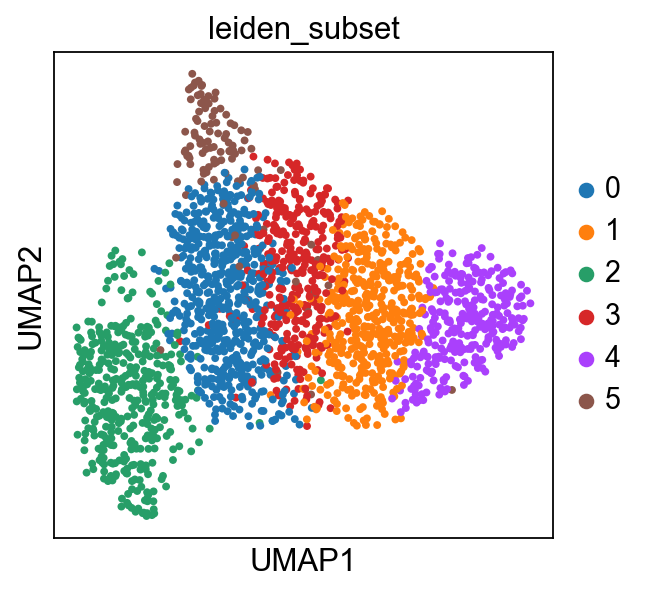

In [11]:
np.random.seed(42)
sc.settings.seed = 42

cdata = cdata[cell_ids].copy()

sc.pp.highly_variable_genes(cdata, n_top_genes=2000, flavor="seurat_v3")

sc.pp.normalize_total(cdata)
sc.pp.log1p(cdata)
sc.pp.scale(cdata, max_value=10)

sc.tl.pca(cdata, use_highly_variable=True)
sc.pp.neighbors(cdata, n_neighbors=15, n_pcs=30)
sc.tl.umap(cdata)

# custom umap for subset of cells
cdata.obsm['X_umap_subset'] = cdata.obsm['X_umap'].copy()

sc.tl.leiden(cdata, resolution=1, key_added='leiden_subset')
sc.pl.umap(cdata, color=['leiden_subset'], size=50)

In [12]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
import warnings
warnings.filterwarnings('ignore')

# 设置scanpy参数
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

def prepare_data_for_slingshot(adata, cluster_key='leiden', embedding_key='X_umap'):
    """
    为Slingshot分析准备数据
    
    Parameters:
    - adata: AnnData对象
    - cluster_key: 聚类结果的键名
    - embedding_key: 降维结果的键名
    """
    # 确保数据格式正确
    if sparse.issparse(adata.X):
        adata.X = adata.X.toarray()
    
    # 获取UMAP坐标和聚类信息
    umap_coords = adata.obsm[embedding_key]
    clusters = adata.obs[cluster_key].astype(str)
    
    print(f"数据维度: {adata.shape}")
    print(f"聚类数量: {len(clusters.unique())}")
    print(f"聚类分布:")
    print(clusters.value_counts().sort_index())
    
    return umap_coords, clusters

def run_slingshot_python(adata, cluster_key='leiden', embedding_key='X_umap', 
                        start_cluster=None, end_clusters=None):
    """
    使用Python实现简化版的Slingshot算法
    
    Parameters:
    - adata: AnnData对象
    - cluster_key: 聚类结果的键名
    - embedding_key: 降维结果的键名
    - start_cluster: 起始聚类（可选）
    - end_clusters: 终点聚类列表（可选）
    """
    from sklearn.neighbors import NearestNeighbors
    from sklearn.cluster import KMeans
    from scipy.spatial.distance import pdist, squareform
    
    # 准备数据
    umap_coords, clusters = prepare_data_for_slingshot(adata, cluster_key, embedding_key)
    
    # 计算聚类中心
    cluster_centers = {}
    for cluster in clusters.unique():
        mask = clusters == cluster
        center = umap_coords[mask].mean(axis=0)
        cluster_centers[cluster] = center
    
    # 构建聚类间的连接图
    centers_array = np.array(list(cluster_centers.values()))
    cluster_names = list(cluster_centers.keys())
    
    # 计算聚类中心间距离
    distances = squareform(pdist(centers_array))
    
    # 构建最小生成树找到主要轨迹
    from scipy.sparse.csgraph import minimum_spanning_tree
    mst = minimum_spanning_tree(distances).toarray()
    
    # 找到轨迹路径
    def find_trajectories(mst, start_idx=None):
        """找到从起点到叶节点的所有路径"""
        # 转换为邻接列表
        adj_list = {}
        for i in range(len(mst)):
            adj_list[i] = []
            for j in range(len(mst)):
                if mst[i, j] > 0 or mst[j, i] > 0:
                    adj_list[i].append(j)
        
        # 找到叶节点（度为1的节点）
        leaf_nodes = [i for i, neighbors in adj_list.items() if len(neighbors) == 1]
        
        # 如果没有指定起点，选择第一个叶节点作为起点
        if start_idx is None:
            start_idx = leaf_nodes[0] if leaf_nodes else 0
        
        # DFS找到所有路径
        def dfs_paths(start, end, path=[]):
            path = path + [start]
            if start == end:
                return [path]
            paths = []
            for node in adj_list[start]:
                if node not in path:  # 避免环路
                    newpaths = dfs_paths(node, end, path)
                    paths.extend(newpaths)
            return paths
        
        # 找到从起点到所有叶节点的路径
        trajectories = []
        for leaf in leaf_nodes:
            if leaf != start_idx:
                paths = dfs_paths(start_idx, leaf)
                trajectories.extend(paths)
        
        return trajectories, leaf_nodes
    
    # 确定起始聚类索引
    start_idx = None
    if start_cluster is not None:
        if start_cluster in cluster_names:
            start_idx = cluster_names.index(start_cluster)
    
    trajectories, leaf_nodes = find_trajectories(mst, start_idx)
    
    print(f"发现 {len(trajectories)} 条轨迹")
    for i, traj in enumerate(trajectories):
        traj_names = [cluster_names[idx] for idx in traj]
        print(f"轨迹 {i+1}: {' -> '.join(traj_names)}")
    
    # 计算伪时间
    pseudotimes = {}
    
    for traj_idx, trajectory in enumerate(trajectories):
        pseudotime = np.zeros(len(clusters))
        
        # 为每个细胞计算到轨迹的距离和伪时间
        for cell_idx, (coord, cluster) in enumerate(zip(umap_coords, clusters)):
            # 找到细胞所属聚类在轨迹中的位置
            if cluster in [cluster_names[i] for i in trajectory]:
                cluster_pos = [cluster_names[i] for i in trajectory].index(cluster)
                # 简单的伪时间计算：基于在轨迹中的位置
                pseudotime[cell_idx] = cluster_pos / (len(trajectory) - 1)
            else:
                # 如果细胞不在当前轨迹上，计算到最近轨迹点的距离
                min_dist = float('inf')
                best_pos = 0
                for pos, traj_cluster_idx in enumerate(trajectory):
                    cluster_center = cluster_centers[cluster_names[traj_cluster_idx]]
                    dist = np.linalg.norm(coord - cluster_center)
                    if dist < min_dist:
                        min_dist = dist
                        best_pos = pos
                pseudotime[cell_idx] = best_pos / (len(trajectory) - 1)
        
        pseudotimes[f'slingshot_pseudotime_{traj_idx+1}'] = pseudotime
    
    # 将结果添加到adata
    for key, values in pseudotimes.items():
        adata.obs[key] = values
    
    # 保存轨迹信息
    adata.uns['slingshot'] = {
        'trajectories': trajectories,
        'cluster_names': cluster_names,
        'cluster_centers': cluster_centers,
        'mst': mst,
        'leaf_nodes': leaf_nodes
    }
    
    return trajectories, pseudotimes

def plot_slingshot_results(adata, cluster_key='leiden', embedding_key='X_umap'):
    """
    可视化Slingshot结果
    """
    umap_coords = adata.obsm[embedding_key]
    clusters = adata.obs[cluster_key]
    
    # 获取轨迹信息
    slingshot_info = adata.uns.get('slingshot', {})
    trajectories = slingshot_info.get('trajectories', [])
    cluster_centers = slingshot_info.get('cluster_centers', {})
    cluster_names = slingshot_info.get('cluster_names', [])
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 原始聚类结果
    ax = axes[0, 0]
    scatter = ax.scatter(umap_coords[:, 0], umap_coords[:, 1], 
                        c=clusters.astype('category').cat.codes, 
                        cmap='tab20', alpha=0.6, s=20)
    
    # 绘制聚类中心和轨迹
    if cluster_centers and trajectories:
        # 绘制聚类中心
        for cluster_name, center in cluster_centers.items():
            ax.scatter(center[0], center[1], c='red', s=100, 
                      marker='x', linewidth=3)
            ax.annotate(cluster_name, (center[0], center[1]), 
                       xytext=(5, 5), textcoords='offset points')
        
        # 绘制轨迹
        colors = plt.cm.Dark2(np.linspace(0, 1, len(trajectories)))
        for traj_idx, trajectory in enumerate(trajectories):
            for i in range(len(trajectory) - 1):
                start_center = cluster_centers[cluster_names[trajectory[i]]]
                end_center = cluster_centers[cluster_names[trajectory[i + 1]]]
                ax.plot([start_center[0], end_center[0]], 
                       [start_center[1], end_center[1]], 
                       color=colors[traj_idx], linewidth=3, alpha=0.7)
    
    ax.set_title('聚类结果和轨迹')
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    
    # 2-4. 伪时间结果
    pseudotime_keys = [key for key in adata.obs.keys() if key.startswith('slingshot_pseudotime')]
    
    for i, pt_key in enumerate(pseudotime_keys[:3]):  # 最多显示3条轨迹
        row = (i + 1) // 2
        col = (i + 1) % 2
        ax = axes[row, col]
        
        scatter = ax.scatter(umap_coords[:, 0], umap_coords[:, 1], 
                           c=adata.obs[pt_key], cmap='viridis', 
                           alpha=0.7, s=20)
        plt.colorbar(scatter, ax=ax)
        ax.set_title(f'伪时间 - 轨迹 {i+1}')
        ax.set_xlabel('UMAP1')
        ax.set_ylabel('UMAP2')
    
    plt.tight_layout()
    plt.show()
    
    # 绘制伪时间分布
    if pseudotime_keys:
        fig, axes = plt.subplots(1, len(pseudotime_keys), 
                                figsize=(5*len(pseudotime_keys), 4))
        if len(pseudotime_keys) == 1:
            axes = [axes]
        
        for i, pt_key in enumerate(pseudotime_keys):
            axes[i].hist(adata.obs[pt_key], bins=50, alpha=0.7)
            axes[i].set_title(f'轨迹 {i+1} 伪时间分布')
            axes[i].set_xlabel('伪时间')
            axes[i].set_ylabel('细胞数量')
        
        plt.tight_layout()
        plt.show()

def analyze_trajectory_genes(adata, trajectory_idx=1, n_genes=10):
    """
    分析轨迹相关基因
    """
    from scipy.stats import spearmanr
    
    pseudotime_key = f'slingshot_pseudotime_{trajectory_idx}'
    
    if pseudotime_key not in adata.obs.columns:
        print(f"未找到轨迹 {trajectory_idx} 的伪时间数据")
        return
    
    pseudotime = adata.obs[pseudotime_key].values
    
    # 计算基因与伪时间的相关性
    correlations = []
    gene_names = adata.var_names if adata.var_names is not None else [f"Gene_{i}" for i in range(adata.n_vars)]
    
    print("计算基因与伪时间的相关性...")
    for i in range(adata.n_vars):
        if i % 1000 == 0:
            print(f"处理基因 {i}/{adata.n_vars}")
        
        gene_expr = adata.X[:, i]
        if sparse.issparse(gene_expr):
            gene_expr = gene_expr.toarray().flatten()
        
        # 只考虑表达的细胞
        expressed_mask = gene_expr > 0
        if np.sum(expressed_mask) > 10:  # 至少10个细胞表达
            corr, pval = spearmanr(pseudotime[expressed_mask], 
                                 gene_expr[expressed_mask])
            if not np.isnan(corr):
                correlations.append((gene_names[i], corr, pval))
    
    # 排序并选择top基因
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)
    
    print(f"\n轨迹 {trajectory_idx} 相关性最高的 {n_genes} 个基因:")
    print("基因名\t\t相关系数\tP值")
    print("-" * 40)
    
    top_genes = []
    for i, (gene, corr, pval) in enumerate(correlations[:n_genes]):
        print(f"{gene:<15}\t{corr:.3f}\t\t{pval:.2e}")
        top_genes.append(gene)
    
    return top_genes, correlations

# 主要分析函数
def main_slingshot_analysis(adata, cluster_key='leiden', embedding_key='X_umap', 
                           start_cluster=None):
    """
    主要的Slingshot分析流程
    """
    print("开始Slingshot伪时间分析...")
    print("=" * 50)
    
    # 1. 运行Slingshot分析
    trajectories, pseudotimes = run_slingshot_python(
        adata, 
        cluster_key=cluster_key, 
        embedding_key=embedding_key,
        start_cluster=start_cluster
    )
    
    # 2. 可视化结果
    print("\n可视化结果...")
    plot_slingshot_results(adata, cluster_key, embedding_key)
    
    # 3. 分析轨迹基因
    print("\n分析轨迹相关基因...")
    for i in range(len(trajectories)):
        print(f"\n轨迹 {i+1} 分析:")
        top_genes, _ = analyze_trajectory_genes(adata, i+1, n_genes=10)
    
    print("\n分析完成！")
    print("结果已保存在adata.obs中（伪时间）和adata.uns['slingshot']中（轨迹信息）")
    
    return adata

# 使用示例
"""
# 加载你的AnnData对象
# adata = sc.read_h5ad('your_data.h5ad')

# 运行分析
adata = main_slingshot_analysis(
    adata, 
    cluster_key='leiden',  # 或者 'leiden_subset'
    embedding_key='X_umap',  # 或者 'X_umap_subset'
    start_cluster='0'  # 可选：指定起始聚类
)

# 查看结果
print("伪时间列:")
pseudotime_cols = [col for col in adata.obs.columns if 'slingshot_pseudotime' in col]
print(pseudotime_cols)

# 查看轨迹信息
print("轨迹信息:")
print(adata.uns['slingshot'])
"""

'\n# 加载你的AnnData对象\n# adata = sc.read_h5ad(\'your_data.h5ad\')\n\n# 运行分析\nadata = main_slingshot_analysis(\n    adata, \n    cluster_key=\'leiden\',  # 或者 \'leiden_subset\'\n    embedding_key=\'X_umap\',  # 或者 \'X_umap_subset\'\n    start_cluster=\'0\'  # 可选：指定起始聚类\n)\n\n# 查看结果\nprint("伪时间列:")\npseudotime_cols = [col for col in adata.obs.columns if \'slingshot_pseudotime\' in col]\nprint(pseudotime_cols)\n\n# 查看轨迹信息\nprint("轨迹信息:")\nprint(adata.uns[\'slingshot\'])\n'

开始Slingshot伪时间分析...
数据维度: (2148, 17079)
聚类数量: 6
聚类分布:
leiden_subset
0    582
1    436
2    393
3    352
4    282
5    103
Name: count, dtype: int64
发现 3 条轨迹
轨迹 1: 0 -> 2
轨迹 2: 0 -> 3 -> 1 -> 4
轨迹 3: 0 -> 5

可视化结果...


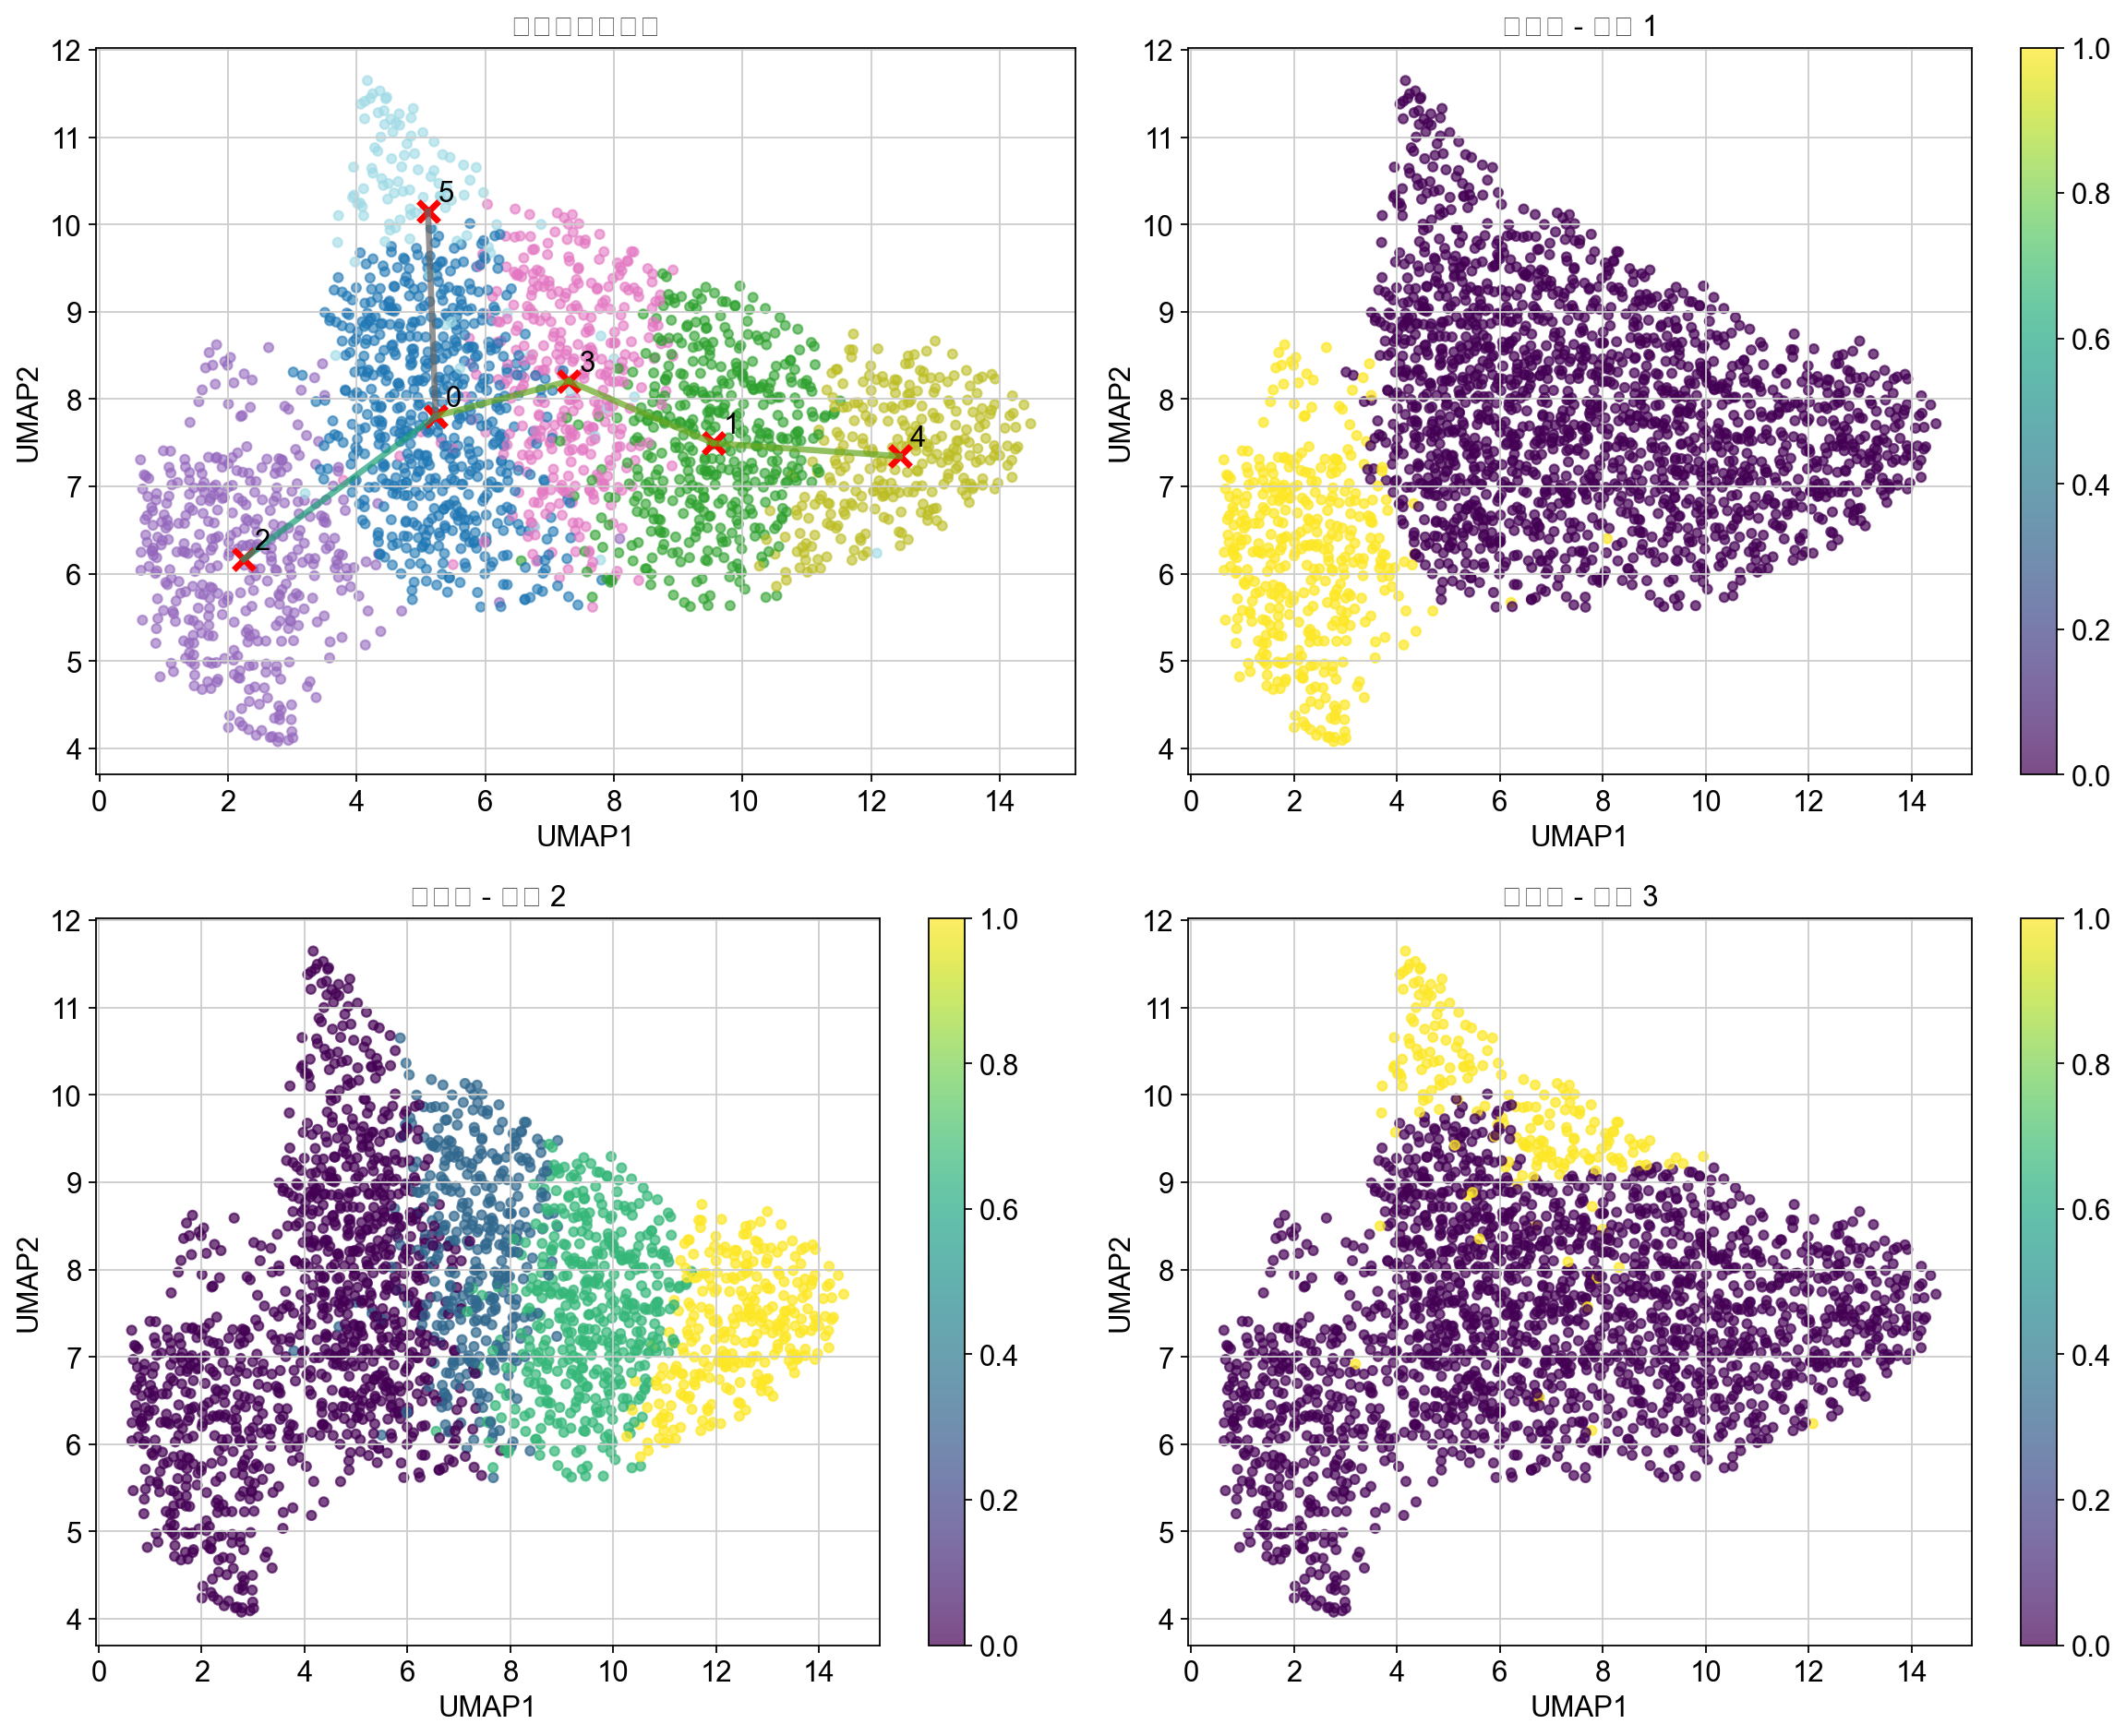

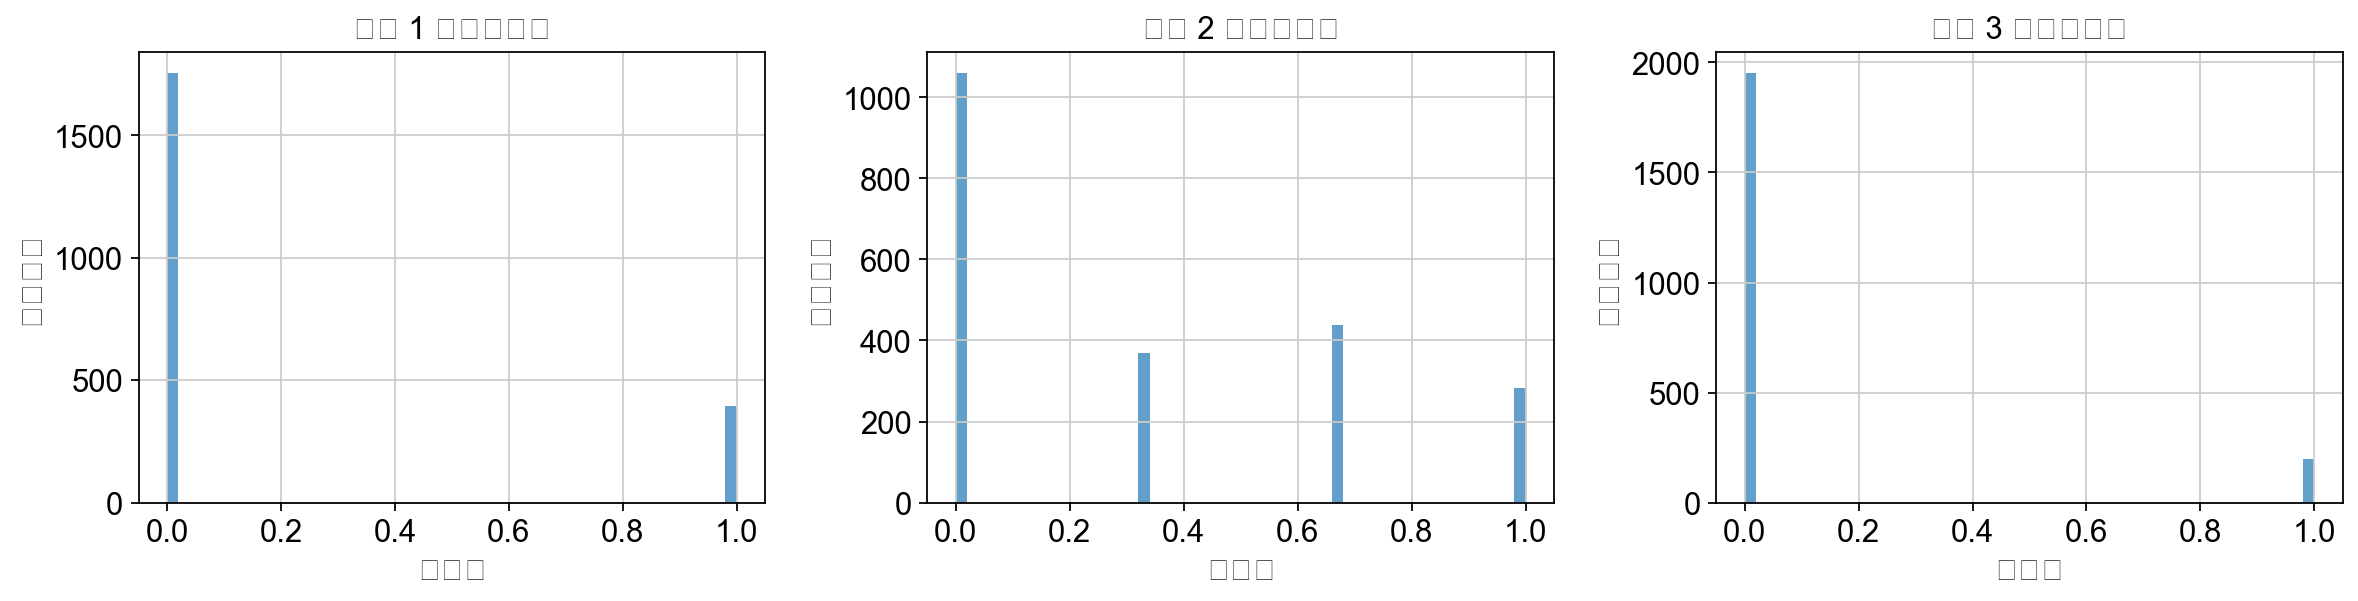


分析轨迹相关基因...

轨迹 1 分析:
计算基因与伪时间的相关性...
处理基因 0/17079
处理基因 1000/17079
处理基因 2000/17079
处理基因 3000/17079
处理基因 4000/17079
处理基因 5000/17079
处理基因 6000/17079
处理基因 7000/17079
处理基因 8000/17079
处理基因 9000/17079
处理基因 10000/17079
处理基因 11000/17079
处理基因 12000/17079
处理基因 13000/17079
处理基因 14000/17079
处理基因 15000/17079
处理基因 16000/17079
处理基因 17000/17079

轨迹 1 相关性最高的 10 个基因:
基因名		相关系数	P值
----------------------------------------
FCER1G         	0.858		6.67e-07
CCDC69         	0.856		2.34e-05
ALOX5          	0.840		4.72e-05
EVA1A          	0.837		9.80e-05
TRAC           	0.802		2.95e-03
SLC16A3        	0.801		6.52e-05
SPI1           	0.801		6.60e-05
MS4A7          	0.799		6.15e-04
CCL21          	0.798		3.24e-03
NAGA           	0.795		5.95e-06

轨迹 2 分析:
计算基因与伪时间的相关性...
处理基因 0/17079
处理基因 1000/17079
处理基因 2000/17079
处理基因 3000/17079
处理基因 4000/17079
处理基因 5000/17079
处理基因 6000/17079
处理基因 7000/17079
处理基因 8000/17079
处理基因 9000/17079
处理基因 10000/17079
处理基因 11000/17079
处理基因 12000/17079
处理基因 13000/17079
处理基因 14000/17079
处理基因 

In [13]:
adata = main_slingshot_analysis(
    cdata, 
    cluster_key='leiden_subset',  # 或者 'leiden_subset'
    embedding_key='X_umap_subset',  # 或者 'X_umap_subset'
    start_cluster='0'  # 可选：指定起始聚类
)

# 查看结果
print("伪时间列:")
pseudotime_cols = [col for col in adata.obs.columns if 'slingshot_pseudotime' in col]
print(pseudotime_cols)

# 查看轨迹信息
print("轨迹信息:")
print(adata.uns['slingshot'])